# Predicting Credit Default Risk


Banks and other financial institutions play a very crucial role in supporting the financial strength of the people. However, lending loan to the clients who cannot repay the amount is not a good thing, as it not only creates bad debt for the institution but also reduces the loan lended to the people who genuinely needed it. Even though banks use several statistical and machine learning methods to predict the clients' repayment abilities, unlocking the full potential of the data available is yet to be acheived. In this project we will predict if the clients are capable of repayment or not. 

### Imports

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###  Reading Data

In [2]:
app_train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')
print('Training Data Shape: ', app_train.shape)
app_train.head()

Training Data Shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The application_train dataset has 307511 rows (each row representing one loan), 122 features including TARGET label column. 

In [3]:
print(list(app_train.columns))

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

### Examine the Distribution of the TARGET Column

TARGET Column is what we have to predict: 0 for loans which were repaid in time, 1 for loans with default in repayment. We will examine the distribution of the column to get a better idea of the loans falling in either category.

In [4]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

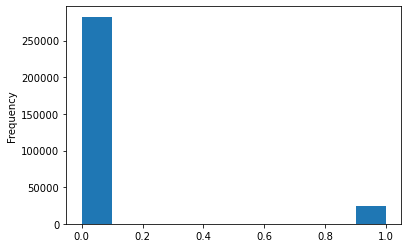

In [5]:
app_train['TARGET'].astype('int').plot.hist()

We can see there is class imbalance in the dataset. There are far more loans that were repaid in time than the loans that were not paid. 

### Examine Missing Values

We will examine each column for missing values by looking at the number and percentage of missing values.

In [6]:
# Function to calculate missing values by columns
def missing_values_table(df):
    # Total Missing Values
    mis_val = df.isnull().sum()
    
    # % of Missing Values
    mis_val_percent = (df.isnull().sum() * 100) / len(df)
    
    # Concatenate the above two columns 
    mis_val_table = pd.concat([mis_val, mis_val_percent], keys=['Missing Values', '% of Total Values'], axis=1)
    
    # Arrange in Descending order
    mis_val_table = mis_val_table[mis_val_table.iloc[:,1] !=0].sort_values('% of Total Values', ascending=False)
    
    #Printing some text
    print('Your dataframe has ' + str(df.shape[1]) + ' columns. \n' + 
          'There are ' + str(mis_val_table.shape[0]) + ' columns with missing values')
    
    return mis_val_table

In [7]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your dataframe has 122 columns. 
There are 67 columns with missing values


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). Boosting Models like LightGB can handle missing values with no need for imputation. We will keep all of the columns for now.

### Column Types

We will examine the column data types to get a better understanding of the data. Based on the column type we will encode our data for the ML models to understand.  

In [8]:
# Column type
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [9]:
# Number of unique categories among categorical attributes
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. 

### Encoding Categorical Variables

In this notebook, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories.

#### Label Encoding and One-Hot Encoding

In [10]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0 # for keeping count of label encoded columns

# for each column in our dataset
for col in app_train:
    # if the column has dtype == object
    if app_train[col].dtype == 'object':
        # and if column has unique categorical values <=2
        if len(list(app_train[col].unique())) <= 2:
            # fit the column using le object created 
            le.fit(app_train[col])
            # transform train
            app_train[col] = le.transform(app_train[col])
            #keeping count of le encoded columns
            le_count += 1
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [11]:
app_train['CODE_GENDER']

0         M
1         F
2         M
3         F
4         M
         ..
307506    M
307507    F
307508    F
307509    F
307510    F
Name: CODE_GENDER, Length: 307511, dtype: object

In [12]:
#One-Hot Encoding the remaining categorical features with more than 2 categories
app_train = pd.get_dummies(app_train)
print(app_train.shape)

(307511, 243)


### Anomalies

 One way to analyse anomalies quantitatively is by looking at the statistics of a column using the describe method.

In [13]:
app_train.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.003941,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.062656,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above statistics, just by looking we can make out the following observations: 
   - CNT_CHILDREN max is 19 while min is 0 and 75% is 1
   - DAYS_BIRTH all in negative
   - DAYS_EMPLOYED max is 365243, and also all in negative
   - DAYS_REGISTRATION in negative and has max 0 while min is -24672.000000 and 75% is -2010.000000: which is reasonably fine.
   - CNT_FAM_MEMBERS max is 20 while 75% is just 3
   - OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE huge max values
   - AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR

**DAYS_BIRTH**: Values in this column are in negative counts i.e. days calculated backwards from the date of application. We will normalize it by dividing the values by -365 which will give the age in years.

In [14]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Age looks reasonable. 

**DAYS_EMPLOYED**: Values in this column are also in negative counts i.e. days calculated backwards from the date of application. However, there seems to be a same positive value across many rows which is 365243. This anomaly has to be treated. 

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


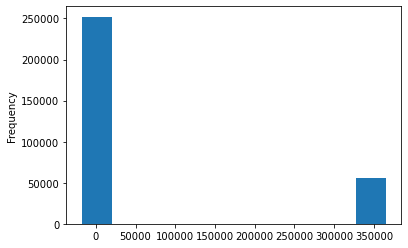

In [15]:
print(app_train['DAYS_EMPLOYED'].describe())
app_train['DAYS_EMPLOYED'].plot.hist()

Above we can see that, around 6k rows have 365243 in the DAYS_EMPLOYED column. We will check if these 6k rows have low or high default risk.

In [16]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Loans with anomalies have a lower rate of default.



Now we will create an anomaly flag column and replace the anomaly values with NaN. This way we will not only get rid of the anomalies in the DAYS_EMPLOYED column but we will have a separate column representing rows which had the anomalies.

Text(0.5, 0, 'Days Employment')

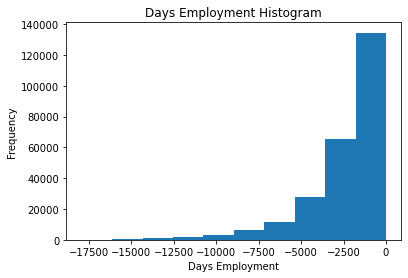

In [17]:
# Create a separate column representing anomalies in boolean values for each row
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# Replace 365243 in DAYS_EMPLOYED column with NaN
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# Visualize the distribution after treating the anomaly
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

The distribution looks to be much more in line with what we would expect. 

Apply the same anomaly treatment to test dataset.

### Correlations

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:
- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”

We will next see the extent of correlation between the TARGET column and remaining columns. With this we will be able to figure out the most important features.  

In [18]:
# Correlation with TARGET
correlations = app_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

We can see that DAYS_BIRTH has the highest positive correlation i.e. as Age INCREASES, the client is MORE likely to make default on payment. However, DAYS_BIRTH column has values in negative which means that it actually has negative correlation i.e. as Age INCREASES, the client is LESS likely to make default.

Similary, External sources have the highest negative correlation. 


**i. DAYS_BIRTH**: First, we will analyse DAYS_BIRTH using Kernal Density Estimate (KDE) plot to show the distribution of the variable.

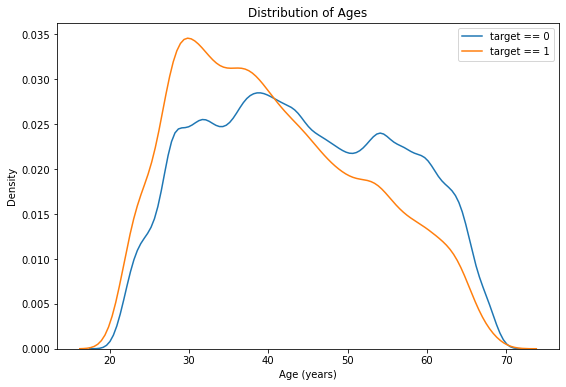

In [19]:
plt.figure(figsize = (9, 6))

# KDE plot to analyse the distributon of DAY_BIRTH in regards to the TARGET
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label='target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label='target == 1')
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');


The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.
### Average failure to repay loans by age bracket
To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [20]:
# Create separate df for age data
age_data = app_train[['TARGET', 'DAYS_BIRTH']]

# Change age in days to years
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Create and allot bins based on age(years)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20,70, num=11))
age_data.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"


In [21]:
# Group the df using Bins
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,-8532.795625,23.377522
"(25.0, 30.0]",0.111436,-10155.219250,27.822518
"(30.0, 35.0]",0.102814,-11854.848377,32.479037
"(35.0, 40.0]",0.089414,-13707.908253,37.555913
"(40.0, 45.0]",0.078491,-15497.661233,42.459346
"(45.0, 50.0]",0.074171,-17323.900441,47.462741
"(50.0, 55.0]",0.066968,-19196.494791,52.593136
"(55.0, 60.0]",0.055314,-20984.262742,57.491131
"(60.0, 65.0]",0.052737,-22780.547460,62.412459


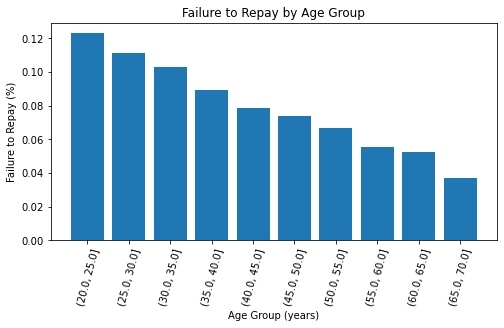

In [22]:
# Visualize the Age Bins
plt.figure(figsize = (8, 4))

plt.bar(age_groups.index.astype(str), age_groups['TARGET'])
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');


There is a clear trend visible from the above visualization. It shows that younger age groups tend to make more default, and as the age increases default rate goes down. This is valuable information which will be used by the model.

**ii. EXTERNAL SOURCES**:  We will analyse EXT_SOURCEs using Kernal Density Estimate (KDE) plot to show the distribution of the variable.

In [23]:
# Create separate df external sources
ext_data = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']]

# Correlation with each others
correlations = ext_data.corr()
correlations

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_1,1.000000,0.213982,0.186846,-0.155317
EXT_SOURCE_2,0.213982,1.000000,0.109167,-0.160472
EXT_SOURCE_3,0.186846,0.109167,1.000000,-0.178919
TARGET,-0.155317,-0.160472,-0.178919,1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

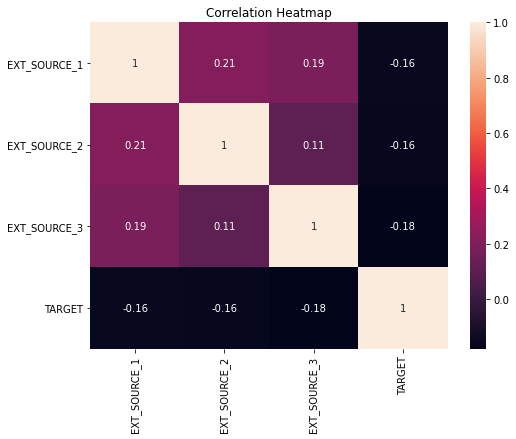

In [24]:
# Visualize correlation using HeatMap
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target

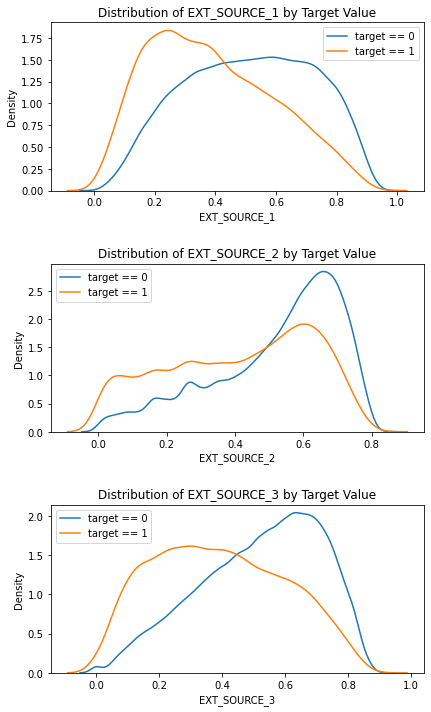

In [25]:
plt.figure(figsize = (6, 10))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # create a new subplot for each source
    plt.subplot(3, 1, i+1)
    
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label='target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label='target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' %source)
    plt.xlabel('%s' %source)
    plt.ylabel('Density')
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

### Feature Engineering

Next, we will use two feature construction methods for feature engineering:

- Polynomial features
- Domain knowledge features

#### Polynomial Features

In this method, we make features that are powers of existing features as well as interaction terms between existing features.

In [26]:
# Create separat df for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

# impute missing values
poly_features = imputer.fit_transform(poly_features)

In [27]:
# Import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Create PolynomialFeatures object
poly_transformer = PolynomialFeatures(degree=3)

# Train Polynomial Features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)


Polynomial Features shape:  (307511, 35)


Above 35 polynomial features are created using just 4 features. To get the names of new features created we use get_feature_names

In [28]:
# Few of the feature names
poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET'])[:10]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2']

Now we can see if these features are correlated with the target. If yes, then the extent of correlations.

In [29]:
# create a df of created polynomial features 
poly_features = pd.DataFrame(poly_features, columns= poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['TARGET'] = poly_target

# find corr 
poly_corr = poly_features.corr()['TARGET'].sort_values()

# Look at the corr
print(poly_corr.head(10))
print(poly_corr.tail())

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features.

We will add these features to a copy of the data.

In [30]:
# merge train df with poly features on SK_ID_CURR
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on='SK_ID_CURR', how='left')

# check size of dataset
print('app_train_poly shape: ', app_train_poly.shape)

app_train_poly shape:  (307511, 280)


#### Domain Knowledge Features

Domain Knowledge Features
Here we will create five features:

- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [31]:
# Duplicate our dataset
app_train_domain = app_train.copy()

# Creating new feature for train set
app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

#### Visualize New Variables
We should explore these domain knowledge variables visually in a graph. For all of these, we will make the same KDE plot colored by the value of the TARGET.

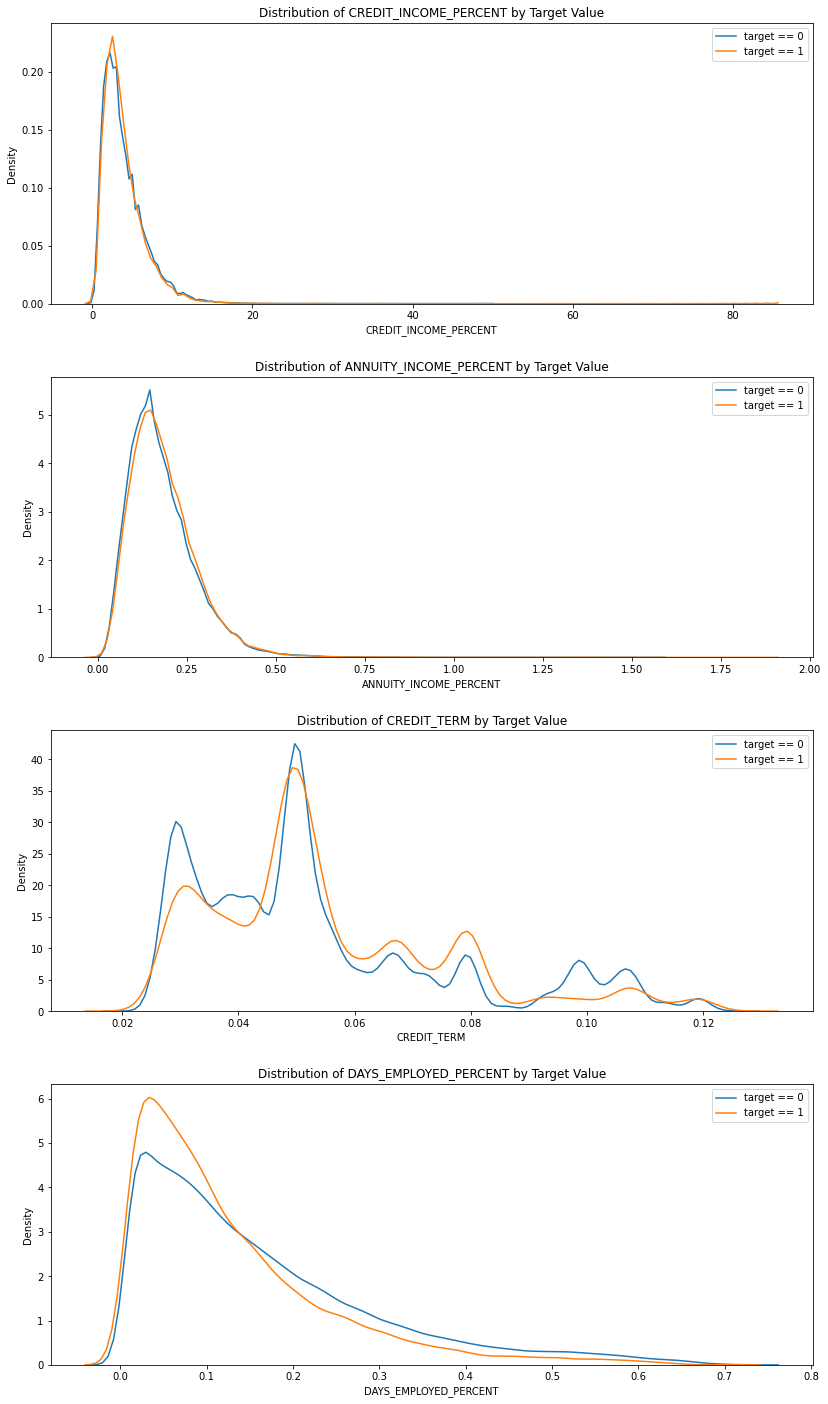

In [32]:
plt.figure(figsize=(12,20))

# iterate through the sources
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4,1,i+1)
    
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label='target == 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label='target == 1')    
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

plt.tight_layout(pad=2.5)

From above graph, we see that Domain Engineered features may not be useful for our model. Hence we will not use them.

### Modelling

### Random Forest

 Let's try using a Random Forest on the same training data to see how that affects performance. The Random Forest is a much more powerful model especially when we use hundreds of trees. We will use 100 trees in the random forest.

#### 1. Random Forest

In [38]:
# Validation Set
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
train, test = train_test_split(app_train, test_size=0.2, random_state=42)

train_labels = train['TARGET'].values
train = train.drop('TARGET', axis=1)
train_col_names = train.columns

test_labels = test['TARGET'].values
test = test.drop('TARGET', axis=1)

# create object for imputation of missing values
imputer = SimpleImputer(strategy='median')
# create object for normalization using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# Fit imputer and transform train and test data
imputer.fit(train) 
train = imputer.transform(train)
test = imputer.transform(test)
print('----Imputer fitted and datasets transformed!!----')
# Fit scaler and transform train and test data
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)
print('----Scaler fitted and datasets transformed!!----')

# print shape
print('Training data shape: ', train.shape)
print('Training label shape: ', train_labels.shape)

print('Testing data shape: ', test.shape)
print('Testing label shape: ', test_labels.shape)

----Imputer fitted and datasets transformed!!----
----Scaler fitted and datasets transformed!!----
Training data shape:  (246008, 243)
Training label shape:  (246008,)
Testing data shape:  (61503, 243)
Testing label shape:  (61503,)


In [39]:
# Import RandomForestClaassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Creating model object
random_forest = RandomForestClassifier(n_estimators=100, random_state = 50, verbose = 1, n_jobs = -1)

# Fitting the model
random_forest.fit(train, train_labels)

# Extract feature importances
features = list(train_col_names)
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'features': features, 'importance': feature_importance_values})

# Make predictions
y_pred = random_forest.predict(test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.0s finished


In [40]:
# Measure Performance using accuracy
from sklearn.metrics import accuracy_score
val_score = accuracy_score(test_labels, y_pred)
print('Random Forests Accuracy is %0.4f using n_estimators %s' %(val_score, random_forest.n_estimators))

Random Forests Accuracy is 0.9196 using n_estimators 100


#### 2. Random Forest with Polynomial Features

In [41]:
app_train_poly.columns

Index(['SK_ID_CURR', 'TARGET_x', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'EXT_SOURCE_2^2 EXT_SOURCE_3', 'EXT_SOURCE_2^2 DAYS_BIRTH',
       'EXT_SOURCE_2 EXT_SOURCE_3^2', 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_2 DAYS_BIRTH^2', 'EXT_SOURCE_3^3',
       'EXT_SOURCE_3^2 DAYS_BIRTH', 'EXT_SOURCE_3 DAYS_BIRTH^2',
       'DAYS_BIRTH^3', 'TARGET_y'],
      dtype='object', length=280)

In [50]:
# Validation Set
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
train, test = train_test_split(app_train_poly, test_size=0.2, random_state=42)

train_labels = train['TARGET_x'].values
train = train.drop(['TARGET_x', 'TARGET_y'], axis=1)
train_col_names = train.columns

test_labels = test['TARGET_x'].values
test = test.drop(['TARGET_x', 'TARGET_y'], axis=1)

poly_features_names = list(train_col_names)

# Impute the polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(train)
poly_features_test = imputer.transform(test)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)


# print shape
print('Training data shape: ', poly_features.shape)
print('Training label shape: ', train_labels.shape)

print('Testing data shape: ', poly_features_test.shape)
print('Testing label shape: ', test_labels.shape)

Training data shape:  (246008, 278)
Training label shape:  (246008,)
Testing data shape:  (61503, 278)
Testing label shape:  (61503,)


In [51]:
random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
y_pred = random_forest_poly.predict(poly_features_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished


In [52]:
# Measure Performance using accuracy
from sklearn.metrics import accuracy_score
val_score = accuracy_score(test_labels, y_pred)
print('Random Forests (with Poly Features) Accuracy is %0.4f using n_estimators %s' %(val_score, random_forest_poly.n_estimators))

Random Forests (with Poly Features) Accuracy is 0.9198 using n_estimators 100
